In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = pd.read_excel('data/s1.xlsx')

In [3]:
S.head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
0,35,NaN,15,40,-81,0.348434,0.01,0.1,plant
1,23,NaN,9,40,-81,0.346003,0.01,0.1,plant
2,23,NaN,12,40,-81,0.374041,0.01,0.1,plant
3,20,NaN,6,40,-81,0.351241,0.01,0.1,plant
4,20,NaN,8,40,-81,0.358171,0.01,0.1,plant


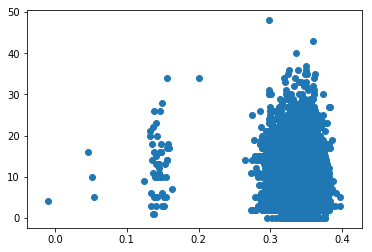

In [15]:
plt.scatter(S.gamma, S.age)
plt.show()

## KMeans

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
k = 6
X = S[['gamma', 'age']]
colors = ['#ff0000', '#009900', '#000099', '#ffff00', '#009999', '#990099']

In [124]:
scaler = StandardScaler()
Xt = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [127]:
X = pd.DataFrame(Xt, index=X.index, columns=X.columns)

In [128]:
X.head()

,gamma,age
0,0.422216,3.413485
1,0.348591,1.676454
2,1.197642,1.676454
3,0.507211,1.242196
4,0.717070,1.242196


In [129]:
pos = np.random.choice(X.index, k)

In [130]:
centroids = X.loc[pos]

In [131]:
centroids

,gamma,age
911,0.070597,0.952691
2848,0.448633,0.084176
678,-0.707921,1.965959
1594,-0.417343,0.952691
1863,-0.231144,-0.060577
2329,0.015260,-0.784340


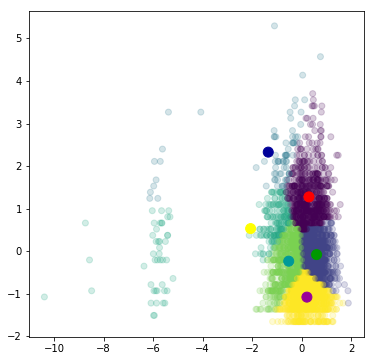

In [169]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(A.gamma, A.age, alpha=0.2, c=A.assignment)
ax.scatter(centroids.gamma, centroids.age, c=colors, s=100)
plt.show()

In [159]:
from sklearn.metrics.pairwise import euclidean_distances

In [160]:
D = euclidean_distances(X, centroids)

In [161]:
assignment = np.argmin(D, axis=1)

In [162]:
from collections import Counter

In [163]:
Counter(assignment).most_common()

[(5, 882), (1, 793), (0, 691), (4, 650), (3, 211), (2, 73)]

In [164]:
A = X.copy()

In [165]:
A['assignment'] = assignment

In [166]:
rss, new_c = 0, []
for i in range(k):
    c = centroids.iloc[i]
    Xc = A[A.assignment == i][['gamma', 'age']]
    Dc = euclidean_distances(Xc, c.values.reshape(1, -1))
    rss += Dc.sum()

In [167]:
rss

2021.270749511864

In [168]:
centroids = A.groupby(['assignment']).mean()